In [53]:
# Compare the spectra of a hammer shot and an event

from obspy import read, Stream, UTCDateTime
from scipy.fft import fft, fftfreq
from numpy import abs, amax
from os.path import join
from matplotlib import pyplot as plt

In [54]:
## Inputs
root = "../data"

timewin_hm = "2020-01-25-12-00-00"
timewin_ev = "2020-01-13-09-00-00"

hmname = "Hammer1"
evname = "Example1"

stlist_hm = ["A10", "A16", "A04", "A05", "A15"]
stlist_ev = ["A09", "A15", "A14", "A03", "A04"]

begin = -0.05
end = 0.4


In [55]:
## Read the hammer and event origin times

### Hammer
inpath = join(root, timewin_hm, f"EventInfo_{hmname}.dat")
with open(inpath, "r") as fp:
    lines = fp.readlines()

fields = lines[0].split()
ori_hm = UTCDateTime(fields[3])

### Event
inpath = join(root, timewin_ev, f"EventInfo_{evname}.dat")
with open(inpath, "r") as fp:
    lines = fp.readlines()

fields = lines[0].split()
ori_ev = UTCDateTime(fields[3])

In [56]:
## Read the hammer and event data

### Hammer
stream_hm = Stream()
for stname in stlist_hm:
    inpath = join(root, timewin_hm, f"*{stname}*.SAC")
    stream_hm += read(inpath)

### Event
stream_ev = Stream()
for stname in stlist_ev:
    inpath = join(root, timewin_ev, f"*{stname}*.SAC")
    stream_ev += read(inpath)

Text(0.5, 0, 'Frequency (Hz)')

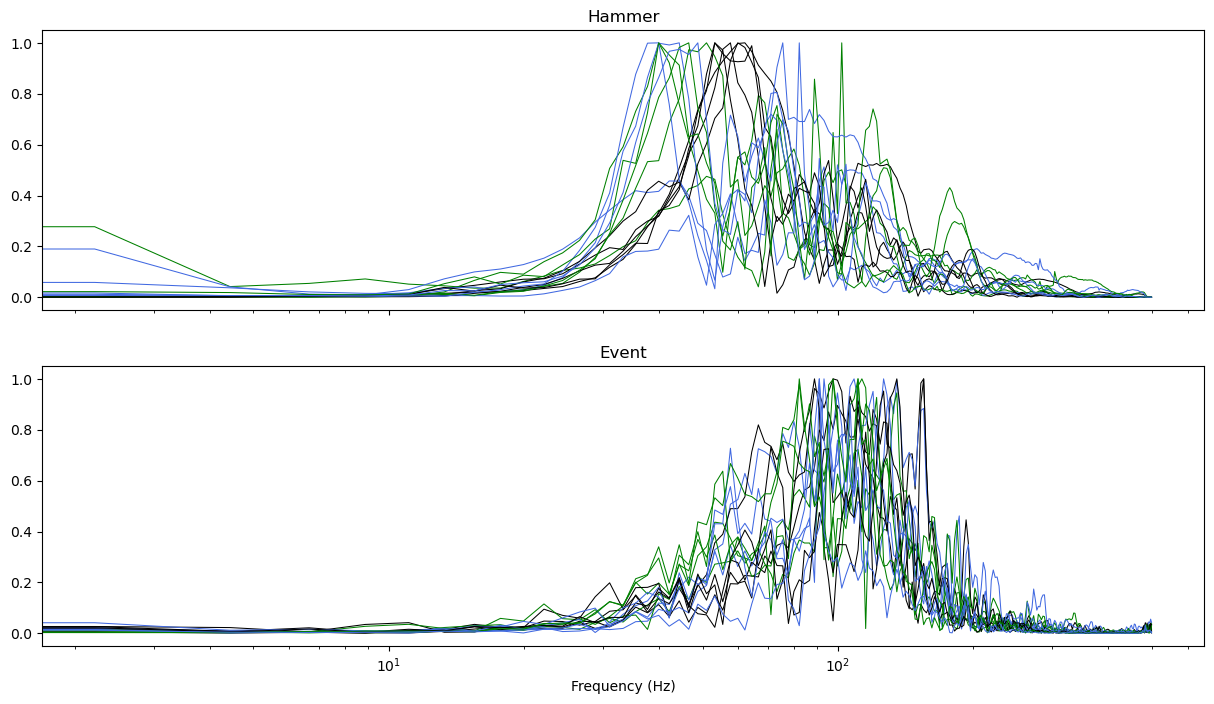

In [57]:
## Compute and plot the spectra of the hammer and event
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

for stname in stlist_hm:
    trace_z = stream_hm.select(station=stname, channel="*Z")[0]
    trace_1 = stream_hm.select(station=stname, channel="*1")[0]
    trace_2 = stream_hm.select(station=stname, channel="*2")[0]

    trace_z.trim(ori_hm+begin, ori_hm+end)
    trace_1.trim(ori_hm+begin, ori_hm+end)
    trace_2.trim(ori_hm+begin, ori_hm+end)

    trace_z.detrend("linear")
    trace_1.detrend("linear")
    trace_2.detrend("linear")

    trace_z.taper(0.02)
    trace_1.taper(0.02)
    trace_2.taper(0.02)

    data_z = trace_z.data
    data_1 = trace_1.data
    data_2 = trace_2.data

    sampling_rate = trace_z.stats.sampling_rate
    numpts = trace_z.stats.npts
    freqax = fftfreq(numpts, d=1/sampling_rate)

    spec_z = abs(fft(data_z))
    spec_1 = abs(fft(data_1))
    spec_2 = abs(fft(data_2))

    spec_z = spec_z / amax(spec_z)
    spec_1 = spec_1 / amax(spec_1)
    spec_2 = spec_2 / amax(spec_2)

    spec_z = spec_z[freqax >= 0]
    spec_1 = spec_1[freqax >= 0]
    spec_2 = spec_2[freqax >= 0]

    freqax = freqax[freqax >= 0]

    ax1.plot(freqax, spec_z, color="k", linewidth=0.75)
    ax1.plot(freqax, spec_1, color="green", linewidth=0.75)
    ax1.plot(freqax, spec_2, color="royalblue", linewidth=0.75)
    ax1.set_xscale("log")

ax1.set_title("Hammer")

for stname in stlist_ev:
    trace_z = stream_ev.select(station=stname, channel="*Z")[0]
    trace_1 = stream_ev.select(station=stname, channel="*1")[0]
    trace_2 = stream_ev.select(station=stname, channel="*2")[0]

    trace_z.trim(ori_ev+begin, ori_ev+end)
    trace_1.trim(ori_ev+begin, ori_ev+end)
    trace_2.trim(ori_ev+begin, ori_ev+end)

    trace_z.detrend("linear")
    trace_1.detrend("linear")
    trace_2.detrend("linear")

    trace_z.taper(0.02)
    trace_1.taper(0.02)
    trace_2.taper(0.02)

    data_z = trace_z.data
    data_1 = trace_1.data
    data_2 = trace_2.data

    sampling_rate = trace_z.stats.sampling_rate
    numpts = trace_z.stats.npts
    freqax = fftfreq(numpts, d=1/sampling_rate)

    spec_z = abs(fft(data_z))
    spec_1 = abs(fft(data_1))
    spec_2 = abs(fft(data_2))

    spec_z = spec_z / amax(spec_z)
    spec_1 = spec_1 / amax(spec_1)
    spec_2 = spec_2 / amax(spec_2)

    spec_z = spec_z[freqax >= 0]
    spec_1 = spec_1[freqax >= 0]
    spec_2 = spec_2[freqax >= 0]

    freqax = freqax[freqax >= 0]

    ax2.plot(freqax, spec_z, color="k", linewidth=0.75)
    ax2.plot(freqax, spec_1, color="green", linewidth=0.75)
    ax2.plot(freqax, spec_2, color="royalblue", linewidth=0.75)
    ax2.set_xscale("log")

ax2.set_title("Event")
ax2.set_xlabel("Frequency (Hz)")
